# <center> Zestaw 5
## <center> Ryszard Pręcikowski
### <center> 401433

In [1]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
from lab5_utils import *
plt.rcParams["figure.figsize"] = (12,8)

## Wykres funkcji $f(x) = \frac{2}{1 + x^2}$

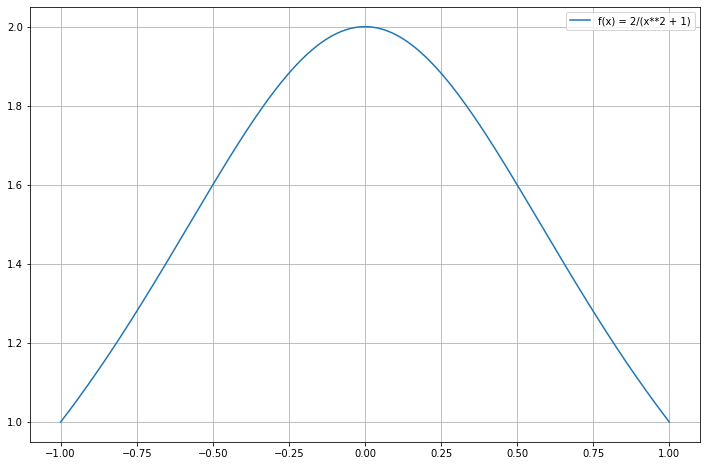

In [2]:
f = 2 / (1 + x**2)
a = -1
b = 1

lf = lambdify(x, f)
x_v = np.linspace(a, b, 1000)

plt.plot(x_v, lf(x_v), label = "f(x) = "+str(f))
plt.legend()
plt.grid(True)
plt.show()
plt.rcParams.update({'font.size': 15})

## Obliczanie wartości całki z dowolnej funkcji w dowolnym przedziale za pomocą podanej metody oraz z wykorzystaniem $n+1$ ewaluacji funkcji podcałkowej.
Dostępne metody obliczania całek oznaczonych:
<ol>
    <li>wzór prostokątów - <i>midpoint</i></li>
    $$\int_a^b f(x)dx = \sum_{i = 0}^{n -1} f(m_i)\cdot h$$
    <center>gdzie $m_i$ jest srodkiem aktualnie rozpatrywanego przedziału</center> 
    <li>wzór trapezów - <i>trapezoidal</i></li>
    $$\int_a^b f(x)dx = \frac h2 \cdot \left ( f(x_0) + 2 \cdot \sum_{i = 1}^{n-1}  f(x_i) + f(x_n) \right )$$
    <li>wzór parabol (Simpson's 1/3 rule) - <i>simpson_parabolic</i></li>
    $$\int_a^b f(x)dx = \frac h3 \cdot \left ( 
    f(x_0) + 2 \cdot \sum_{i = 1}^{n/2-1} f(x_{2i}) + 4 \cdot \sum_{i = 1}^{n/2} f(x_{2i - 1}) + f(x_n) 
    \right )$$
    <li>Simpson's 3/8 rule - <i>simpson_cubic</i></li>
    $$\int_a^b f(x)dx = \frac{3h}{8} \cdot \left ( 
    f(x_0) + 3 \cdot \sum_{i \neq 3k}^{n-1} f(x_{i}) + 2 \cdot \sum_{i = 1}^{n/3-1} f(x_{3i}) + f(x_n) 
    \right )$$
    <center>gdzie $k \in \mathbb{N_0}$</center>
    <li>metoda Gaussa-Legendre'a - <i>gauss_legendre</i></li>
    $$\int_{-1}^1 f(x)dx =  
    \sum_{k = 1}^{n}w_k\cdot f(x_k)
    $$
    <ul><ul><ul><ul>gdzie</ul></ul></ul></ul>
    $$w_i = \frac{2}{(1 - x_i^2) \cdot (P_n'(x_i))^2}$$
    <center>a $x_i$ jest $i$-tym miejscem zerowym wielomianu Legendre'a $P_i(x)$</center>
    <ul><ul><ul><ul>aby zmienić przedział całkowania na dowolny możemy wykorzystać proste przekształcenie</ul></ul></ul></ul>
    $$\int_a^b = \frac{b-a}{2} \sum_{k=1}^{n}w_k \cdot f \left (\frac{b-a}{2}x_i + \frac{a+b}{2} \right )$$
</ol>

In [3]:
def my_integrate(f, m, mode, a = -1, b = 1):
    def fk(k):
        return lf(a + k * h)

    h = (b-a)/(m)
    lf = lambdify(x, f)

    if mode == Mode.MIDPOINT:
        res = 0
        for k in range(m):
            res += fk(k + 0.5)
        res *= h

    elif mode == Mode.TRAPEZOIDAL:
        res = fk(0) + fk(m)
        for k in range(1, m):
            res += 2 * fk(k)
        res *= h / 2

    elif mode == Mode.SIMPSON_PARABOLIC:
        res = fk(0) + fk(m)
        for k in range(1, m):
            if k % 2 == 0:
                res += 2* fk(k)
            else:
                res += 4* fk(k)
        res *= h / 3

    elif mode == Mode.SIMPSON_CUBIC:
        res = fk(0) + fk(m)

        for k in range(1, m):
            if k % 3 == 0:
                res += 2* fk(k)
            else:
                res += 3* fk(k)
        res *= 3*h / 8

    elif mode == Mode.GAUSS_LEGENDRE:
        res = Gauss_Legendre(f, m, a, b)

    return res

def Gauss_Legendre(f, m, a = -1, b = 1):
    p = legendre_poly(m, x, polys=True)
    r = p.real_roots()
    p_diff = diff(p, x)

    lf = lambdify(x, f)
    res = 0
    
    # zmiana przedzialu na (-1, 1)
    interval_sum = (a + b) /2
    interval_sub = (b - a) /2 

    for legendre_root in r:
        if legendre_root == 0 or type(legendre_root) == Mul: # przypadki gdy sympy oblicza wartości jednoznacznie
            x_v = legendre_root
        else:
            x_v = legendre_root.eval_rational() # przypadek gdy dostajemy wzór
        w = 2 / ((1 - x_v**2) * (p_diff(x_v)** 2))
        
        res += w * lf(interval_sub * x_v + interval_sum)

    res *= interval_sub

    return float(res)

## Porównanie metod dla małej ilości liczby ewaluacji

In [4]:
s = 1
t = 10

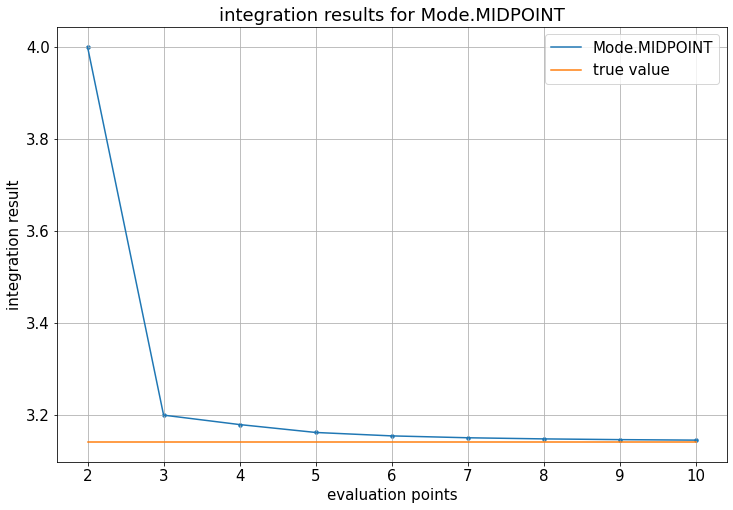

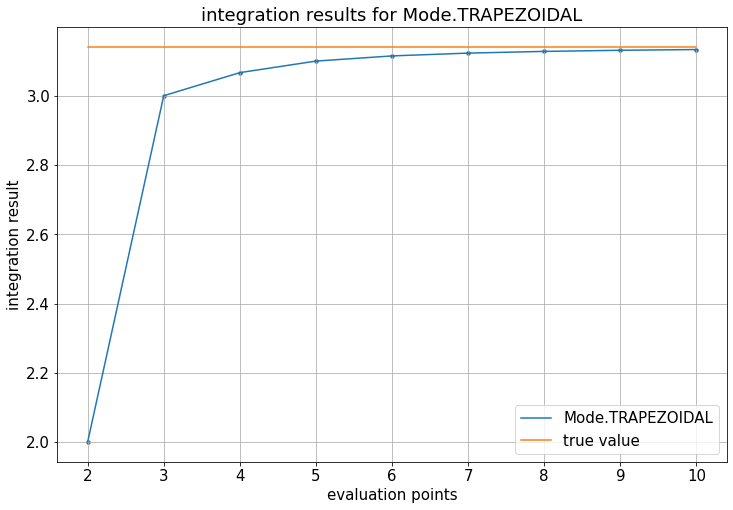

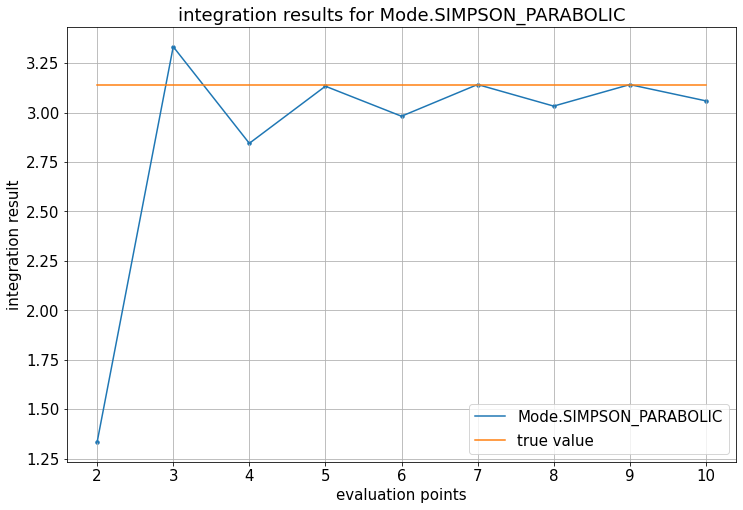

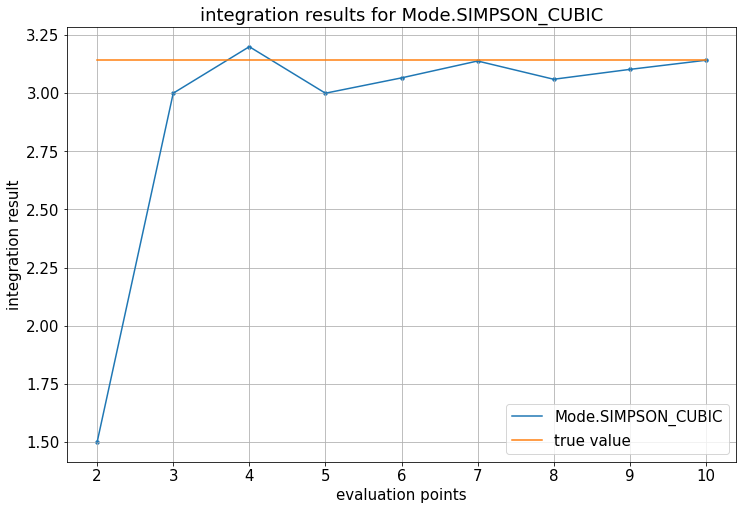

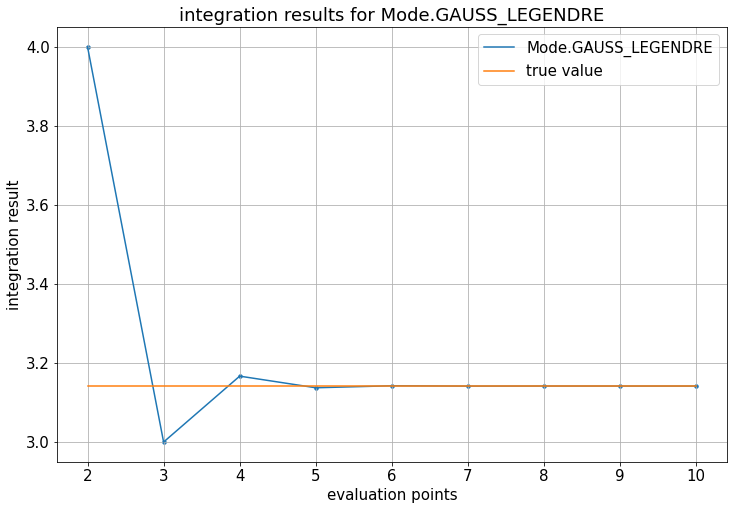

In [5]:
plot_integrations(f, s, t, True, a, b)

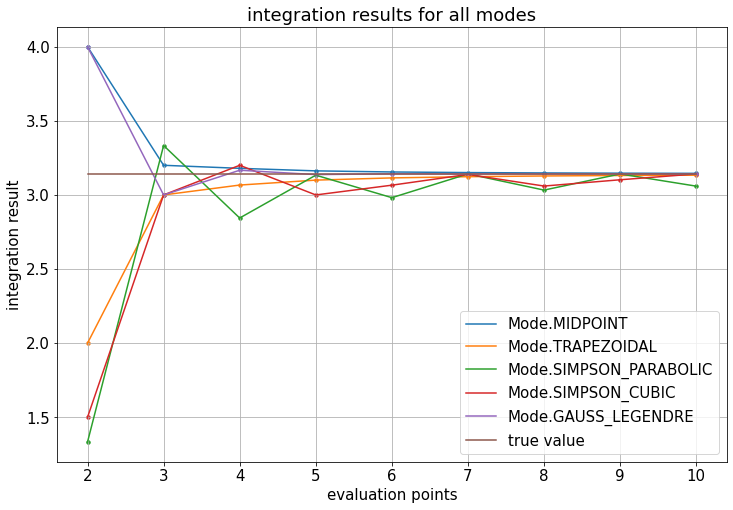

In [6]:
plot_integrations(f, s, t, a=a, b=b)

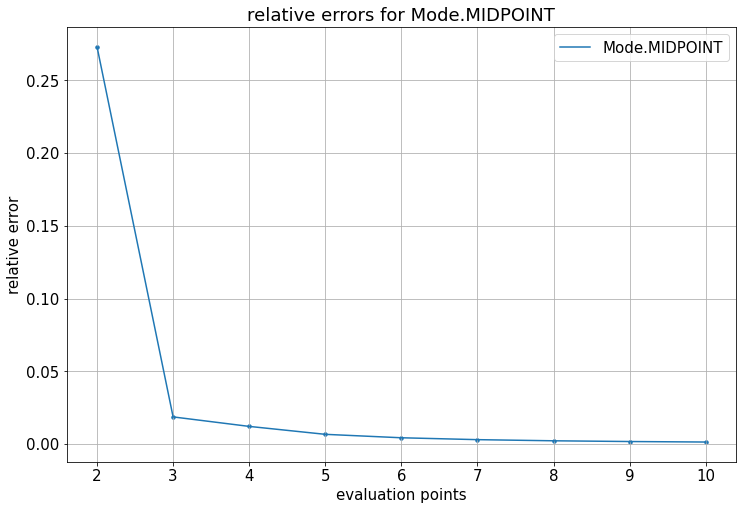

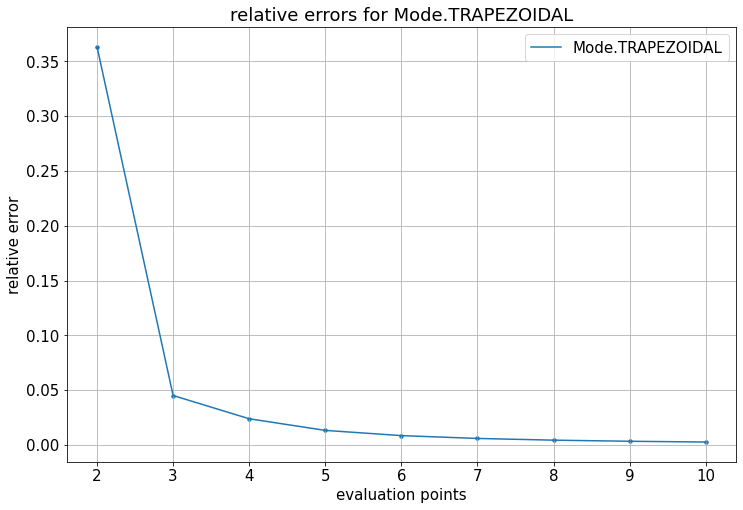

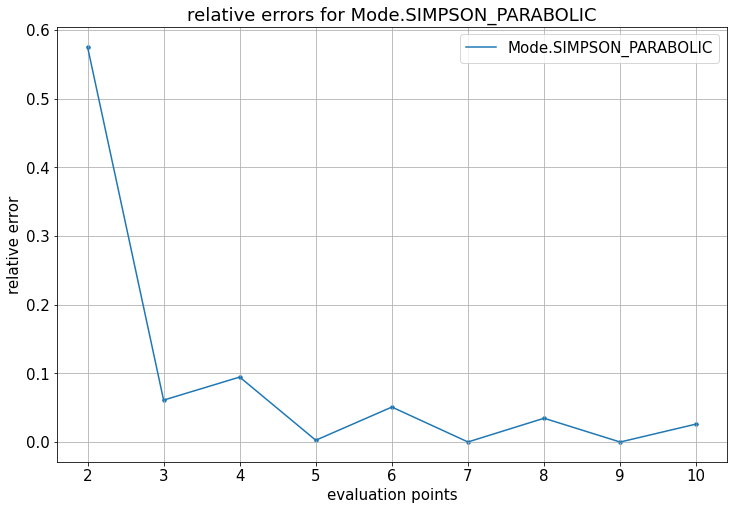

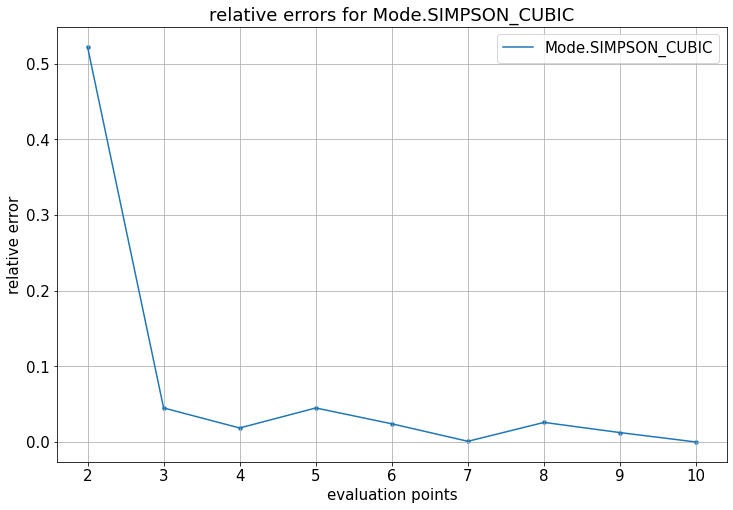

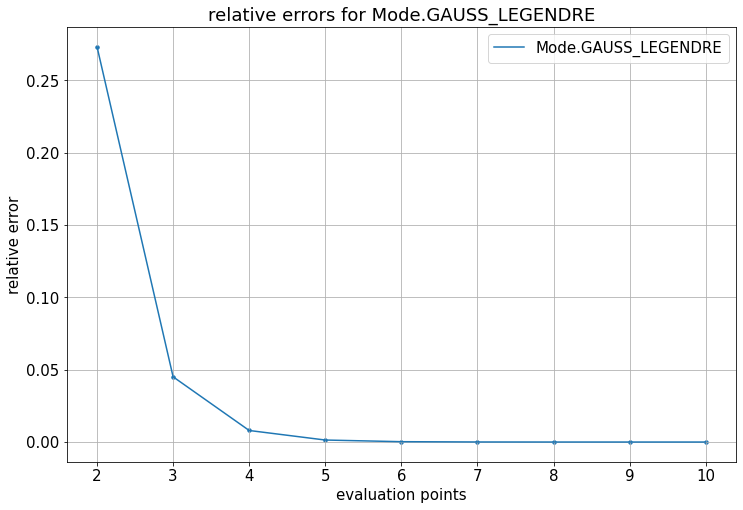

In [7]:
plot_errors(f, s, t, True, a, b)

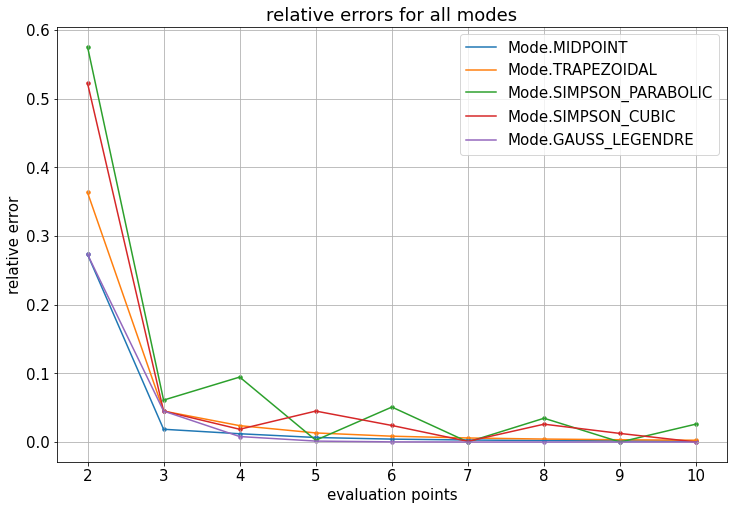

In [8]:
plot_errors(f, s, t, a=a, b=b)

#### Dla każdej metody wykorzystanie 2 punktów ewaluacji hest obarczone bardzo dużym błędem.
#### Dla większej ilości niż 4 najlepszą metodą jest metoda Gaussa Legendra
#### Dokładność metod Simpsona jest zależna okresowo od ilości punktów.

## Porównanie metod dla większych ilośći punktów ewaluacji

In [9]:
s = 10
t = 50

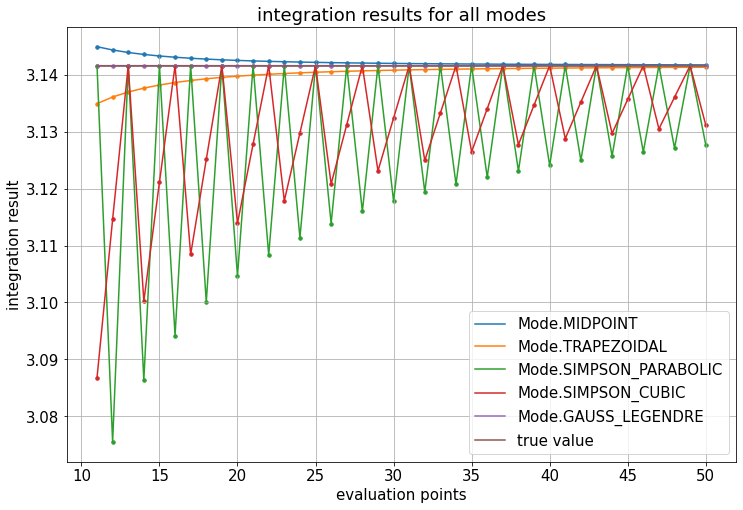

In [10]:
plot_integrations(f, s, t, a=a, b=b)

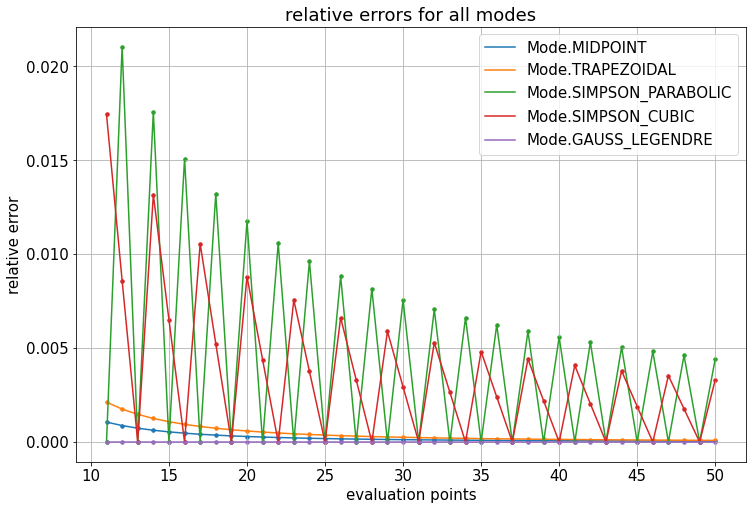

In [11]:
plot_errors(f, s, t, a=a, b=b)

#### Dokładność wszystkich metod rośnie wraz z wzrostem ilości punktów ewaluacji.
#### Najlepszą metodą jest metoda Gaussa Legendra, drugą wzór prostokątów, a trzecią wzór trapezów.
#### Na tym wykresie widzimi jeszcze dokładniej okresową zależność metod Simpsona.
Metoda 1/3 (parabol) jest dokładna dla nieparzystej ilości ewaluacji, natomiast jest najgorsza dla parzystych

Metoda 3/8 (cubic) jest dokładna dla k + 1 ilości ewaluacji, gdzie k to kolejne liczby podzielne przez 3
#### metoda prostokątów oblicza wartości większe niż w rzeczywistości, natomiast reszta metod generuje wyniki mniejsze